In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
studentRecord = pd.read_csv('studentRecord2.csv')

In [3]:
studentRecord = studentRecord[["Gender","Year", "1-TCE", "1-CE", "1-GPA","2-TCE","2-CE","2-GPA","TCP", "TCF","TCR","GPA",
                               "Status"]]
studentRecord.head()

,Gender,Year,1-TCE,1-CE,1-GPA,2-TCE,2-CE,2-GPA,TCP,TCF,TCR,GPA,Status
0,M,2016,24,9,2.88,22,8,2.95,43,3,46,2.826,1
1,F,2016,24,9,2.50,22,8,1.41,30,16,46,2.022,0
2,F,2016,24,9,3.38,22,8,2.41,46,0,46,2.761,1
3,M,2016,24,9,4.00,22,8,3.00,46,0,46,3.326,1
4,M,2016,24,9,2.63,22,8,2.64,41,5,46,2.565,1


In [4]:
studentRecord.shape

(906, 13)

In [5]:
studentRecord['Status'].value_counts()

1    729
0    177
Name: Status, dtype: int64

In [6]:
studentRecord.isnull().sum().sum()

0

In [7]:
studentRecord['TCP'].value_counts()

46    355
43    174
40     81
37     62
34     26
36     22
41     20
33     19
38     19
42     18
31     13
44     13
39     10
35     10
30      9
27      9
32      8
24      5
28      5
29      5
23      4
26      4
22      3
25      2
49      2
21      2
12      1
5       1
13      1
17      1
10      1
19      1
Name: TCP, dtype: int64

In [8]:
studentRecord.describe()

,Year,1-TCE,1-CE,1-GPA,2-TCE,2-CE,2-GPA,TCP,TCF,TCR,GPA,Status
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,2018.066225,24.015453,9.001104,2.808709,21.996689,7.998896,2.807539,41.240618,4.782561,46.012141,2.737047,0.804636
std,1.390587,0.366835,0.137052,0.854147,0.099668,0.033223,0.837227,5.928631,5.959547,0.380268,0.739643,0.396700
min,2016.000000,22.000000,8.000000,0.290000,19.000000,7.000000,0.000000,5.000000,0.000000,43.000000,0.087000,0.000000
25%,2017.000000,24.000000,9.000000,2.210000,22.000000,8.000000,2.230000,38.000000,0.000000,46.000000,2.177000,1.000000
50%,2018.000000,24.000000,9.000000,2.830000,22.000000,8.000000,2.770000,43.000000,3.000000,46.000000,2.739000,1.000000
75%,2019.000000,24.000000,9.000000,3.420000,22.000000,8.000000,3.410000,46.000000,8.000000,46.000000,3.261000,1.000000
max,2020.000000,27.000000,10.000000,4.750000,22.000000,8.000000,5.000000,49.000000,41.000000,49.000000,4.587000,1.000000


## A histogram for each numerical attribute

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': '1-TCE'}>,
        <Axes: title={'center': '1-CE'}>],
       [<Axes: title={'center': '1-GPA'}>,
        <Axes: title={'center': '2-TCE'}>,
        <Axes: title={'center': '2-CE'}>],
       [<Axes: title={'center': '2-GPA'}>,
        <Axes: title={'center': 'TCP'}>, <Axes: title={'center': 'TCF'}>],
       [<Axes: title={'center': 'TCR'}>, <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'Status'}>]], dtype=object)

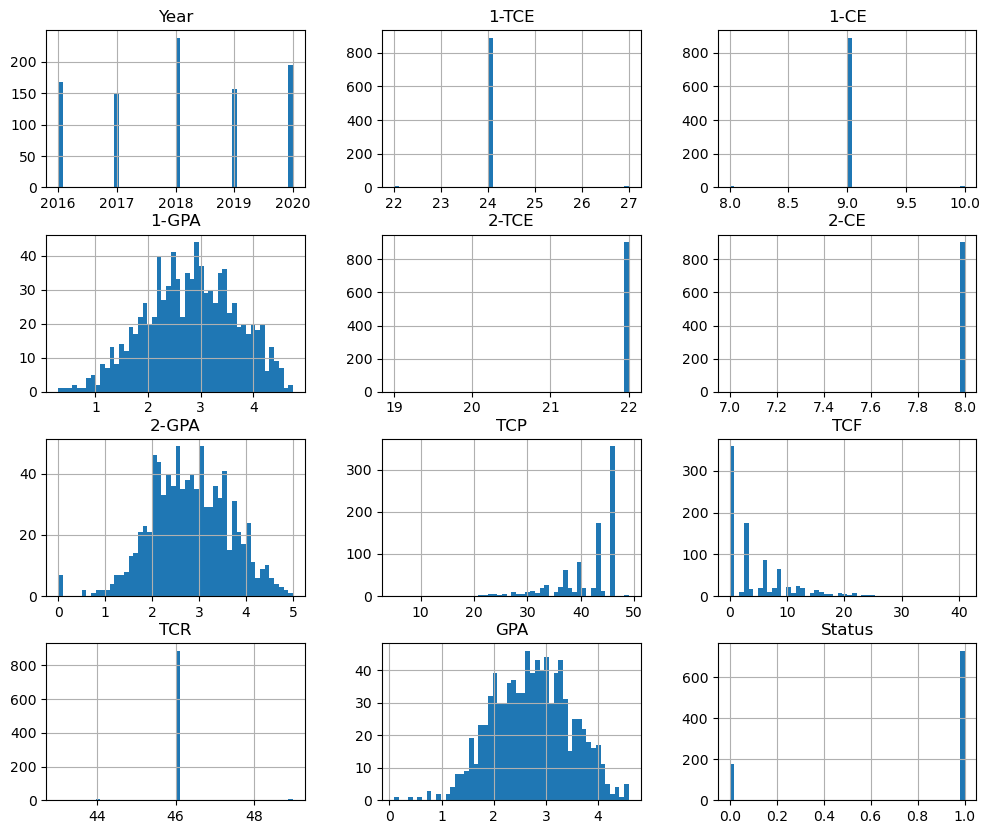

In [9]:
studentRecord.hist(bins = 50, figsize=(12,10))

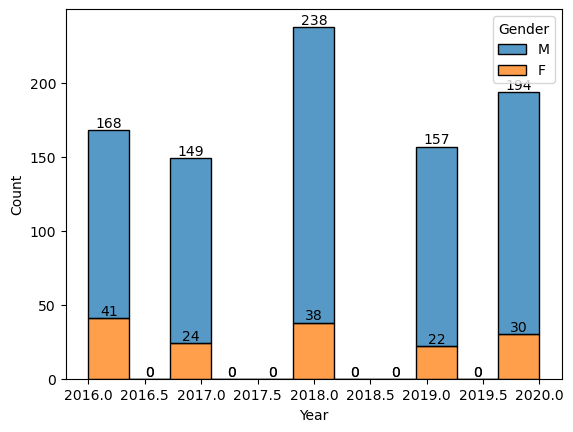

In [10]:
ax = sns.histplot(data = studentRecord, x = "Year", hue ="Gender", multiple="stack")
for i in ax.containers:
    ax.bar_label(i,)

Text(0.5, 1.0, 'Student Rentention for 2016,2017,2018,2018,2020')

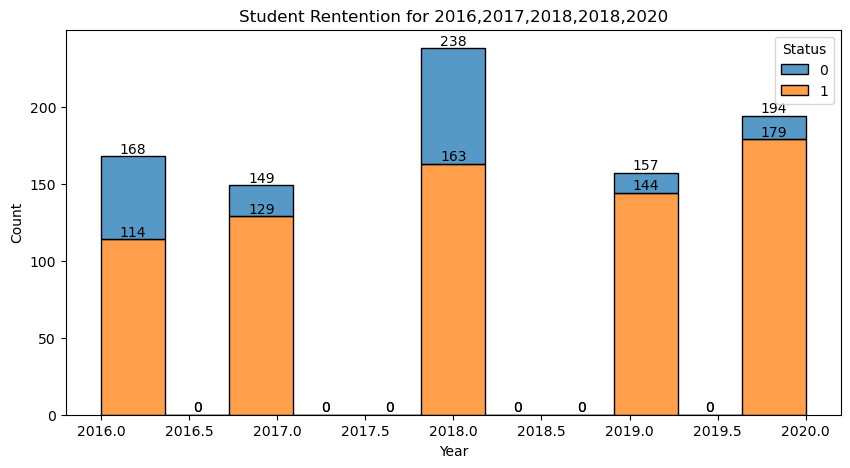

In [11]:
ax = sns.histplot(data = studentRecord, x = "Year", hue ="Status", multiple="stack")
for i in ax.containers:
    ax.bar_label(i,)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title("Student Rentention for 2016,2017,2018,2018,2020")

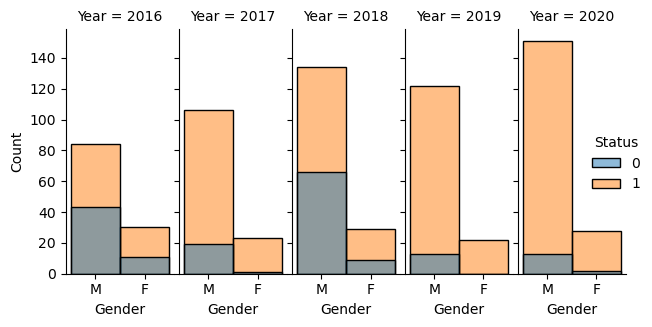

In [12]:
sns.displot(data = studentRecord, x = "Gender", hue = "Status", col = "Year")
fig = plt.gcf()
fig.set_size_inches(6,3)

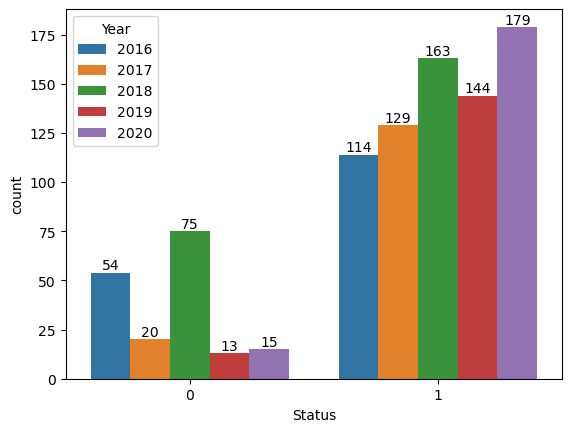

In [13]:
ax = sns.countplot(x = "Status", hue = "Year", data = studentRecord)
for i in ax.containers:
    ax.bar_label(i,)

C:\Users\HP\AppData\Local\Temp\ipykernel_10296\1106855169.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = studentRecord.corr().round(1)


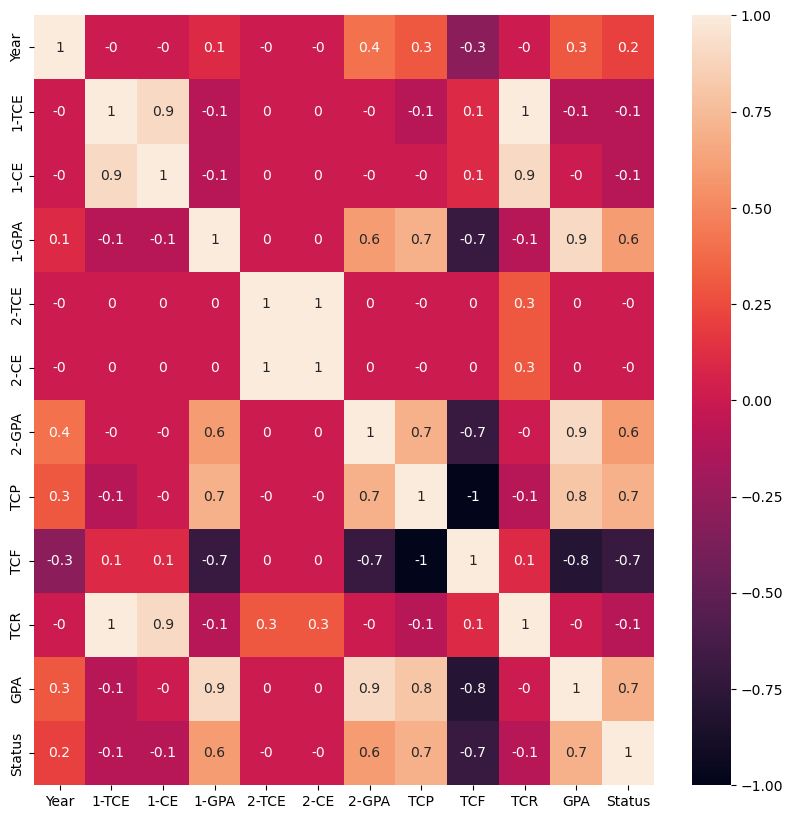

In [14]:
fig, ax = plt.subplots(figsize = (10,10))
matrix = studentRecord.corr().round(1)
sns.heatmap(matrix,annot = True, cbar = True, ax = ax)
plt.show()

In [15]:
a = studentRecord["1-GPA"]
b = studentRecord["Status"]

Text(0, 0.5, 'b axis')

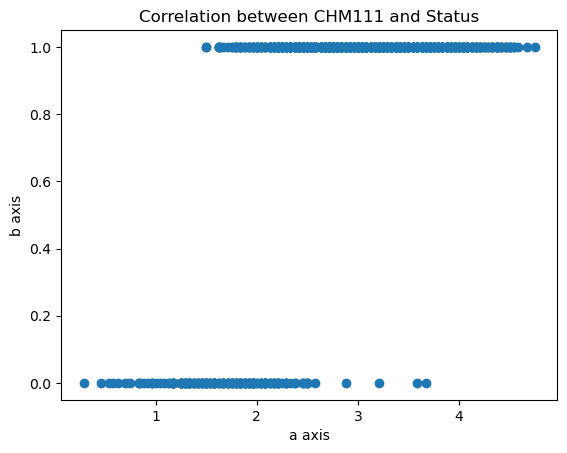

In [16]:
plt.title("Correlation between CHM111 and Status")
plt.scatter(a,b)
plt.xlabel("a axis")
plt.ylabel("b axis")

In [17]:
studentRecord = studentRecord.drop(columns = "Year")

## Perform One Hot-Encoding

In [18]:
studentRecord['Gender'] = studentRecord['Gender'].astype('category')
studentRecord['Gender'] = studentRecord['Gender'].cat.codes

In [19]:
studentRecord.head(4)

,Gender,1-TCE,1-CE,1-GPA,2-TCE,2-CE,2-GPA,TCP,TCF,TCR,GPA,Status
0,1,24,9,2.88,22,8,2.95,43,3,46,2.826,1
1,0,24,9,2.50,22,8,1.41,30,16,46,2.022,0
2,0,24,9,3.38,22,8,2.41,46,0,46,2.761,1
3,1,24,9,4.00,22,8,3.00,46,0,46,3.326,1


<Axes: >

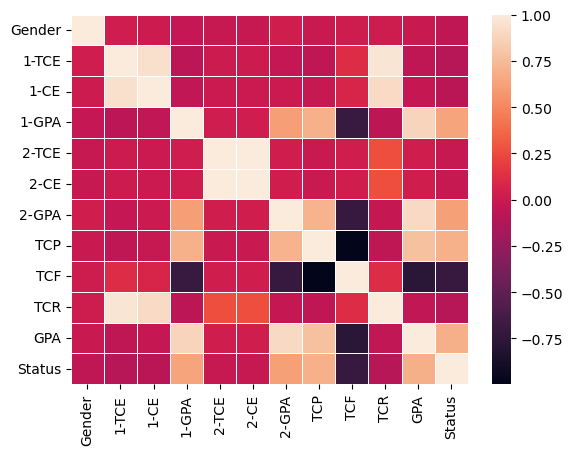

In [20]:
sns.heatmap(studentRecord.corr(), cbar = True, linewidth = 0.5)

## Train & Test Data

In [21]:
X = studentRecord.drop("Status", axis = 1)
y = studentRecord["Status"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.3, random_state = 10)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
 logreg = LogisticRegression(max_iter = 3000)
logreg = logreg.fit(X_train, y_train)

In [25]:
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Test set score: 0.989


In [26]:
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))

Training set score: 0.983


In [27]:
logreg.predict(X_train)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [28]:
prediction = logreg.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.99      1.00      0.99       222

    accuracy                           0.99       272
   macro avg       0.99      0.97      0.98       272
weighted avg       0.99      0.99      0.99       272



In [31]:
print(accuracy_score(y_test, prediction))

0.9889705882352942


In [32]:
print(confusion_matrix(y_test, prediction))

[[ 47   3]
 [  0 222]]


In [33]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,prediction))
print(recall_score(y_test,prediction))


0.9866666666666667
1.0


,Gender,1-TCE,1-CE,1-GPA,2-TCE,2-CE,2-GPA,TCP,TCF,TCR,GPA
0,1,24,9,2.88,22,8,2.95,43,3,46,2.826
1,0,24,9,2.50,22,8,1.41,30,16,46,2.022
2,0,24,9,3.38,22,8,2.41,46,0,46,2.761
3,1,24,9,4.00,22,8,3.00,46,0,46,3.326
4,1,24,9,2.63,22,8,2.64,41,5,46,2.565
...,...,...,...,...,...,...,...,...,...,...,...
901,1,24,9,1.50,22,8,3.05,34,12,46,2.261
902,1,24,9,1.83,22,8,3.86,30,16,46,2.848
903,1,24,9,1.88,22,8,2.82,43,3,46,2.348
904,1,24,9,1.67,22,8,3.14,38,8,46,2.457


In [35]:
X = np.array([[1,24,9,1.88,22,8,3.86,30,16,46,2.848]])
X

array([[ 1.   , 24.   ,  9.   ,  1.88 , 22.   ,  8.   ,  3.86 , 30.   ,
        16.   , 46.   ,  2.848]])

In [36]:
y_pred = logreg.predict(X)
y_pred

C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [43]:
import pickle

In [44]:
data = {"model": logreg}
with open('save2.plk','wb') as file:
    pickle.dump(data,file)

In [45]:
with open('save2.plk','rb') as file:
    data = pickle.load(file)

logreg_loaded = data["model"]

In [46]:
y_pred = logreg_loaded.predict(X)
y_pred

C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)